In [1]:
import numpy as np
from scipy.sparse import diags, kron, csr_matrix, csc_matrix
from scipy.sparse.linalg import spsolve, norm, inv, eigsh
import matplotlib.pyplot as plt
from matplotlib import rc
import scipy as sp

*Universidad de Chile*  
*Facultad de Ciencias Físicas y Matemáticas*  
*Departamento de Ingeniería Matemática*

**MA5307-1 Análisis Numérico de EDP: Teoría y Laboratorio**  
**Profesor:** Axel Osses  
**Auxiliares:** Emir Chacra y Vicente Salinas

**Integrantes:** Sebastián Cobaise, Arturo Lazcano, Benjamin Tardy

# Laboratorio 1

El objetivo de esta sesión práctica es aprender a resolver EDP’s en 2
dimensiones mediante el Método de las Diferencias Finitas.

Específicamente se resolverá la ecuación de Poisson en un rectángulo unitario y en un dominio perforado, además se estudiará la aproximación para condiciones de borde en dominios con curvatura

# Parte a


## Ecuación de Poisson

Considere la ecuación dada por

$$
\begin{equation}
\left.
\begin{array}[c]{rll}
-\Delta u= & 0 & \text{sobre }\Omega=\left[  0,1\right]^{2}\\
u(0,y)=u(1,y)= & 0 & \text{en }0\leq y\leq 1\\
u(x,0)= & 0 & \text{en }0\leq x\leq 1\\
u(x,1)= & g(x) & \text{en }0\leq x\leq 1
\end{array}
\right\} \quad (1)
\end{equation}
$$

Sea $N\in\mathbb{N}$, considere la aproximación del cuadrado unitario dado por la malla de puntos
$$
\Omega_{h}=\left\{  \left(  x_{j},y_{k}\right)  \mid j,k\in\left\{
0,1,\ldots,N+1\right\}  \right\}
$$
donde $x_{j}=jh$, $y_{k}=kh$, $h=\dfrac{1}{N+1}$. Se define el operador laplaciano discretizado por 5 puntos como
$$
\Delta_{N}u_{j,k}=\dfrac{1}{h^{2}}\left(  u_{j+1,k}+u_{j-1,k}
+  u_{j,k-1}+u_{j,k+1}
-4u_{jk}\right)
$$
donde $u_{jk}$ aproxima a $u\left(x_{j},y_{k}\right)  $.

Tomando $g(x) = \sin(\pi x)$, se puede demostrar que la solución única de esta ecuación está dada por

$$u\left(  x,y\right)  =\frac{\sin\left( \pi x\right)   \sinh\left( \pi y\right)  }{\sinh\left(  \pi\right) } $$

**P1.** Escriba dos funciones que calculen $\boldsymbol{A}_{h}$ y $\boldsymbol{b}_{h}$ de la forma más simple posible. Las entradas para estas funciones deben ser $N$ y $g$.

También escriba una función `solve` que, utilizando estas funciones (y las funciones auxiliares que necesite), entregue la solución aproximada.

**Indicación.** Revise la documentación del comando `kron` (disponible a través de `scypy.sparse`)

In [46]:
def Ah(N): 
  h = 1/(N+1) 
  e = np.ones(N)
  f = np.ones(N-1) 
  k = np.array([-f,4*e,-f], dtype= object) #Lista con los vectores 
  offset = [-1,0,1] #Posiciones respecto a la diagonal en que se ubicarán los vectores 
  B = sp.sparse.diags(k,offset).todense() #Definir matriz sparse diagonal 
  I = np.eye(N) 
  A1 = np.kron(I,B)
  A1=np.reshape(A1, (N**2,N**2))

  #A1 representa la diagonal con 4 y los -1 que se encuentran en las subdiagonales 1 y -1

  h1 = np.ones(N-1)
  k1 = np.array([h1,h1])
  offset1 = [-1,1]
  diags=sp.sparse.diags(k1,offset1).todense()
  A2=np.kron(diags,-I)
  A2=np.reshape(A2, (N**2,N**2))

  #A2 representa los -1 que están en las subdiagonales -N y N 

  return ((1/h)**2)*(A1+A2) 
 
def bh(N,f,g): 
  h = 1/(N+1) 
  b = np.zeros(N**2)
  for j in range(1,N+1):
    for i in range(1,N+1):
      b[(j-1)*N+i-1]=f(i*h,j*h) 
      if j==N:
        b[(j-1)*N+i-1]+=(g(i*h)/h**2)
  return b

def solve(N, f, g):
  """ Resuelve el problema del laplaciano en 2D en (0,1)^2, con condiciones
  Dirichlet en el borde, usando una grilla uniforme, con tamano de
  paso h=1/N en x e y.
  """
  sol = sp.sparse.linalg.spsolve(Ah(N),bh(N,f,g))
  sol1 = np.reshape(sol, (N,N))
  return sol1

**P2.** Resuelva la ecuación para $N = 10, 20, 30, 40, 50$. Comente sus resultados.

/usr/local/lib/python3.7/dist-packages/scipy/sparse/linalg/dsolve/linsolve.py:138: SparseEfficiencyWarning: spsolve requires A be CSC or CSR matrix format
  SparseEfficiencyWarning)


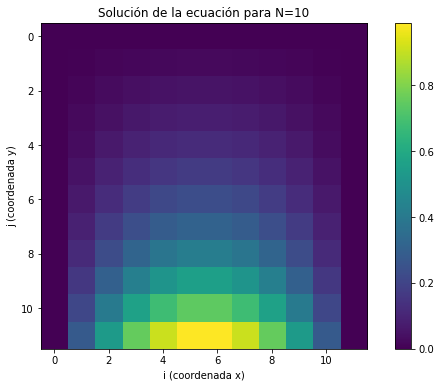

/usr/local/lib/python3.7/dist-packages/scipy/sparse/linalg/dsolve/linsolve.py:138: SparseEfficiencyWarning: spsolve requires A be CSC or CSR matrix format
  SparseEfficiencyWarning)


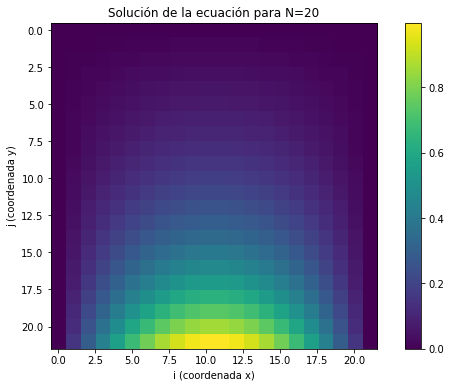

/usr/local/lib/python3.7/dist-packages/scipy/sparse/linalg/dsolve/linsolve.py:138: SparseEfficiencyWarning: spsolve requires A be CSC or CSR matrix format
  SparseEfficiencyWarning)


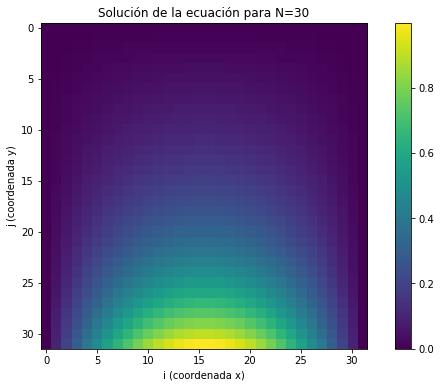

/usr/local/lib/python3.7/dist-packages/scipy/sparse/linalg/dsolve/linsolve.py:138: SparseEfficiencyWarning: spsolve requires A be CSC or CSR matrix format
  SparseEfficiencyWarning)


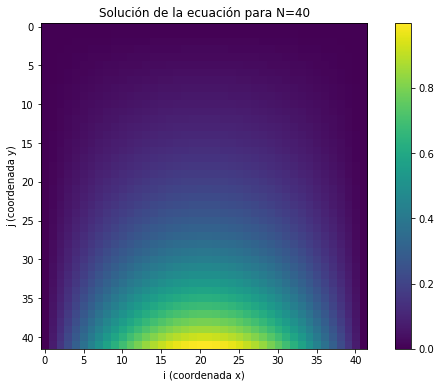

/usr/local/lib/python3.7/dist-packages/scipy/sparse/linalg/dsolve/linsolve.py:138: SparseEfficiencyWarning: spsolve requires A be CSC or CSR matrix format
  SparseEfficiencyWarning)


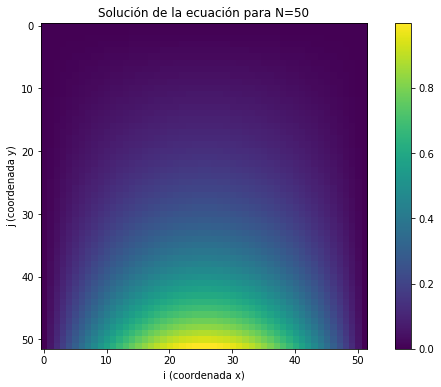

In [47]:
def f1(x,y):
  return 0
def g1(x):
  return np.sin(np.pi*x) 
for N in [10,20,30,40,50]:
  sol=solve(N,f1,g1)
  sol_real=np.zeros((N+2,N+2))
  for i in range(0,N+2):
    for j in range(0,N+2):
      if i==N+1:
        sol_real[i,j]=g1(j/(N+1))
      else:
        if i==0 or j==0 or j==N+1:
          sol_real[i,j]=0
        else:
          sol_real[i,j]=sol[i-1,j-1]
  fig = plt.figure(figsize = (10,6))
  plt.imshow(sol_real)
  plt.title("Solución de la ecuación para N="+str(N))
  plt.colorbar()
  plt.xlabel("i (coordenada x)")
  plt.ylabel("j (coordenada y)")
  plt.show()

Para todo valor de N. se obtiene algo acorde a lo esperado, la condición de borde impone que en un comienzo solo hay "calor" (si se interpreta la barra de color como tal) en un solo lado del dominio $[0,1]\times[0,1]$, el cual corresponde a cuando $j=N+1$, por lo que se evidencia una difusión de calor al interior del dominio desde aquel lado.

A medida que N aumenta, la figura se ve más suave y se espera que se vaya convergiendo a la solución analítica.

**P3.** Estudie el condicionamiento en norma $2$ de la Matriz $A_h$.

**Indicación.** Sean $p\in\left[  1,+\infty\right]  $ y $\boldsymbol{A}\in\mathbb{R}^{N\times N}$. Se define la norma inducida $p$ de $\boldsymbol{A}$ como
$$
\left\Vert \boldsymbol{A}\right\Vert _{p}=\sup\limits_{\boldsymbol{x\in}\mathbb{R}^{N}\setminus\left\{  \boldsymbol{0}\right\}  }\dfrac{\left\Vert\boldsymbol{Ax}\right\Vert _{p}}{\left\Vert \boldsymbol{x}\right\Vert_{p}}
$$
y, si $\boldsymbol{A}$ es invertible, el número de condición en norma inducida $p$ como $\operatorname{cond}_{p}\left(  \boldsymbol{A}\right)  =\left\Vert
\boldsymbol{A}\right\Vert _{p}\left\Vert \boldsymbol{A}^{-1}\right\Vert _{p}$.

En este caso particular, como $\boldsymbol{A}_{h}$ es simétrica, el número de condición en la norma $2$ inducida puede calcularse como
$$
\operatorname{cond}_{2}\left(  \boldsymbol{A}_{h}\right)  =\dfrac{\lambda_{\max,h}\left(  \boldsymbol{A}_{h}\right)  }{\lambda_{\min,h}\left(\boldsymbol{A}_{h}\right)}
$$
donde $\lambda_{\max,h}\left(  \boldsymbol{A}_{h}\right)  =\max\left\{\left\vert \lambda\right\vert \mid\lambda\in\sigma\left(  \boldsymbol{A}_{h}\right)  \right\}  $ y $\lambda_{\min,h}\left(  \boldsymbol{A}_{h}\right)
=\min\left\{  \left\vert \lambda\right\vert \mid\lambda\in\sigma\left(\boldsymbol{A}_{h}\right)  \right\}  $.

/usr/local/lib/python3.7/dist-packages/matplotlib/cbook/__init__.py:1317: ComplexWarning: Casting complex values to real discards the imaginary part
  return np.asarray(x, float)


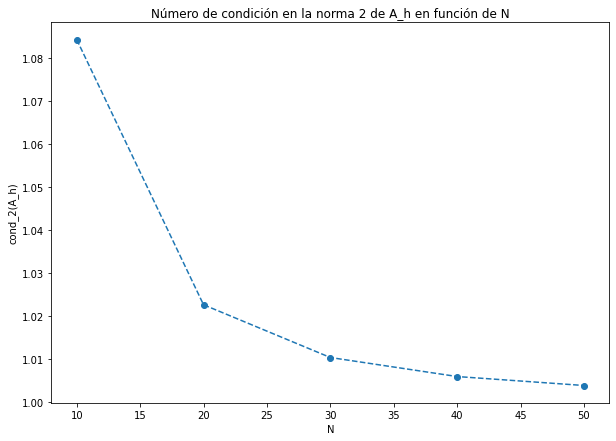

In [4]:
def cond_2_sparse(A):
  """
  Calcula el numero de condicionamiento en norma inducida 2
  para una matriz sparse simetrica A.
  Se obtiene como el valor propio de mayor módulo dividido por el de menor módulo
    
  Input:
  - A matriz sparse simetrica
  
  Documentacion de eigsh:
  https://docs.scipy.org/doc/scipy-0.15.1/reference/generated/scipy.sparse.linalg.eigsh.html
  """
  eigen,vec=sp.sparse.linalg.eigs(A)
  cond=max(eigen)/min(eigen)
    
  return cond

conds=[]
Ns=np.arange(10,51,10)
for N in Ns:
  conds.append(cond_2_sparse(Ah(N)))
fig = plt.figure(figsize = (10,7))
plt.plot(Ns,conds,'--o')
plt.title("Número de condición en la norma 2 de A_h en función de N")
plt.xlabel("N")
plt.ylabel("cond_2(A_h)")
plt.show()

Se evidencia que el número de condición en la norma 2 de $A_h$ decae asintóticamente a un valor cercano a 1 a medida que el N aumenta, lo que significa que los valores propios de la matriz se van haciendo iguales.

# Parte b

## Ecuación en Dominios Perforados

Para $\Omega = [0, 1]^2\backslash B ((0.5, 0.5), 0.3)$, considere:
$$
\left(  P \right)  \left\{
\begin{array}
[c]{ccc}
-\Delta u(x,y)=&0,  & \text{si }(x,y)\text{ en }\Omega \\
u(x,y)=&g(x,y), & \text{si} (x,y)\text{ en }\partial\Omega
\end{array}
\right.
$$

y $g$ dada por:

$$
g\left(  x,y\right)  =\left\{
\begin{array}
[c]{cc}
2  & \text{si }(x,y) \in \partial [0,1]^2 \\
0  & \text{si }(x,y) \in \partial B ((0.5, 0.5), 0.3)
\end{array}
\right.
$$






**P1.** Genere una función que reciba un punto de la malla $(x_j , y_k)$ y entregue como resultado $1$ si es un
punto interior al cual se le puede calcular $\Delta u$ con la aproximación utilizada en la fórmula de $5$ puntos.

In [34]:
def xx(xj,yk,h):
  if (xj+h-0.5)**2+(yk-0.5)**2>0.3**2:
    if (xj-h-0.5)**2+(yk-0.5)**2>0.3**2:
      return 1
    else:
      return 0
  else:
    return 0

def yy(xj,yk,h):
  if (xj-0.5)**2+(yk+h-0.5)**2>0.3**2:
    if (xj-0.5)**2+(yk-h-0.5)**2>0.3**2:
      return 1
    else:
      return 0
  else:
    return 0

def interior(xj,yk,h):
  return xx(xj,yk,h)*yy(xj,yk,h)

**P2.** Asuma que la matriz del sistema es de la forma $A = A_x + A_y$, donde $A_x$ tiene los coeficientes adecuados
para la aproximación de la derivada parcial según $x$ y lo equivalente para $A_y$. Encuentre la forma
que deben tener $A_x$ y $A_y$ y escriba un programa que calcule dichas matrices.

In [41]:
def Ahx(N):
  h=1/(N+1)
  Ax=np.zeros((N**2,N**2))
  #iterar en los indices de las variables x (i) e y (j)
  for j in range(1,N+1):
    for i in range(1,N+1):
      row = np.zeros(N**2)
      #comprobar si su derivada se puede calcular
      if xx(i*h,j*h,h)==1:
        #colocar indices de la columna normalmente
        row[(j-1)*N+i-1]=2
        if i==1:
          row[(j-1)*N+i+1-1]=-1
        elif i==N:
          row[(j-1)*N+i-1-1]=-1
        else:
          row[(j-1)*N+i+1-1]=-1
          row[(j-1)*N+i-1-1]=-1
      else:
        #comprobar el caso en la que el punto está adentro de la perforación, en tal caso se coloca un vector canónico como fila
        if (i*h-0.5)**2+(j*h-0.5)**2<0.3**2:
          row[(j-1)*N+i-1]=1
        else:
          #caso izquierda de la perforación
          if i*h<0.5:
            hbarra=abs((0.5-np.sqrt(0.3**2-(j*h-0.5)**2))-i*h)
            gamma=2/(hbarra*h+hbarra**2)
            alfa=2/(hbarra*h+h**2)
            beta=-alfa-gamma          
            #se multiplica por h**2 porque despues se divide por h**2
            row[(j-1)*N+i-1]=-beta*(h**2)
            row[(j-1)*N+i-1-1]=-alfa*(h**2)

          else: #i*h>0.5 caso derecha de la perforación
            hbarra=abs(i*h-(0.5+np.sqrt(0.3**2-(j*h-0.5)**2)))
            gamma=2/(hbarra*h+hbarra**2)
            alfa=2/(hbarra*h+h**2)
            beta=-alfa-gamma          
            row= np.zeros(N**2)
            #se multiplica por h**2 porque despues se divide por h**2
            row[(j-1)*N+i-1]=-beta*(h**2)
            row[(j-1)*N+i+1-1]=-alfa*(h**2)
      Ax[(j-1)*N+i-1,:]=row
  return (1/(h**2))*Ax

def Ahy(N):
  h=1/(N+1)
  Ay=np.zeros((N**2,N**2))
  #iterar en los indices de las variables x (i) e y (j)
  for j in range(1,N+1):
    for i in range(1,N+1):
      row = np.zeros(N**2)
      #comprobar si su derivada se puede calcular
      if yy(i*h,j*h,h)==1:
        #colocar indices de la columna normalmente
        row[(j-1)*N+i-1]=2
        if j==1:
          row[(j-1)*N+i+N-1]=-1
        elif j==N:
          row[(j-1)*N+i-N-1]=-1
        else:
          row[(j-1)*N+i+N-1]=-1
          row[(j-1)*N+i-N-1]=-1
      else:
        #comprobar el caso en la que el punto está adentro de la perforación, en tal caso se coloca un vector canónico como fila
        if (i*h-0.5)**2+(j*h-0.5)**2<0.3**2:
          row[(j-1)*N+i-1]=1
        else:
          #caso abajo de la perforación
          if j*h<0.5:
            hbarra=abs((0.5-np.sqrt(0.3**2-(i*h-0.5)**2))-j*h)
            gamma=2/(hbarra*h+hbarra**2)
            alfa=2/(hbarra*h+h**2)
            beta=-alfa-gamma          
            #se multiplica por h**2 porque despues se divide por h**2
            row[(j-1)*N+i-1]=-beta*(h**2)
            row[(j-1)*N+i-N-1]=-alfa*(h**2)

          else: #i*h>0.5 #caso arriba de la perforación
            hbarra=abs(j*h-(0.5+np.sqrt(0.3**2-(i*h-0.5)**2)))
            gamma=2/(hbarra*h+hbarra**2)
            alfa=2/(hbarra*h+h**2)
            beta=-alfa-gamma          
            #se multiplica por h**2 porque despues se divide por h**2
            row[(j-1)*N+i-1]=-beta*(h**2)
            row[(j-1)*N+i+N-1]=-alfa*(h**2)
      Ay[(j-1)*N+i-1,:]=row
  return (1/(h**2))*Ay

**P3.** Escriba una función que calcule $b_h$ adaptado a este caso.

In [48]:
def bh(N):
  h=1/(N+1)
  b=np.zeros(N**2)
  for j in range(1,N+1):
    for i in range(1,N+1):
      #Cuando el punto interior está cerca del borde, al b hay que sumarle un coeficiente por la condición de borde
      if i==1:
        b[(j-1)*N+i-1]+=(2/h**2)
      if i==N:
        b[(j-1)*N+i-1]+=(2/h**2)
      if j==1:
        b[(j-1)*N+i-1]+=(2/h**2)
      if j==N:
        b[(j-1)*N+i-1]+=(2/h**2)
  return b

def solve2(N):
  Ax=Ahx(N)
  Ay=Ahy(N)
  Ah=Ax+Ay
  b=bh(N)
  sol = sp.sparse.linalg.spsolve(Ah,b)
  sol1= np.reshape(sol, (N,N))
  return sol1


**P4.** Resuelva el sistema y grafique la solución aproximada para $N = 10, 20, 30, 40, 50$. Comente sus resultados.

/usr/local/lib/python3.7/dist-packages/scipy/sparse/linalg/dsolve/linsolve.py:138: SparseEfficiencyWarning: spsolve requires A be CSC or CSR matrix format
  SparseEfficiencyWarning)


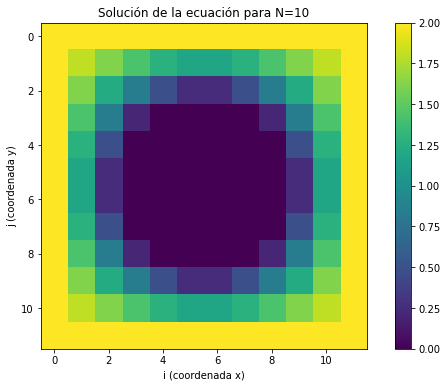

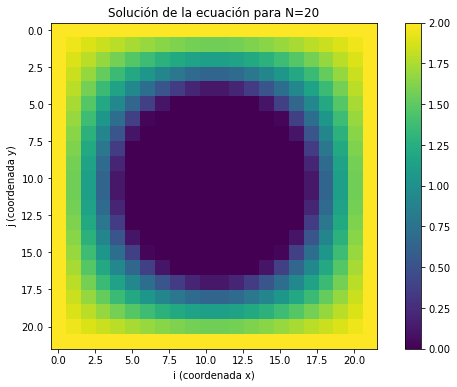

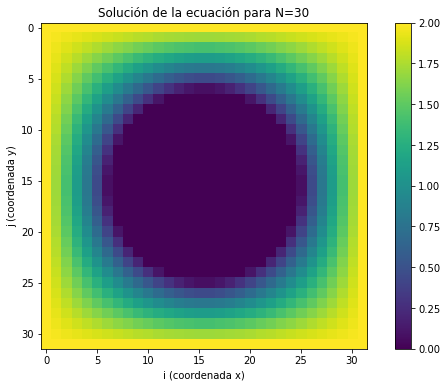

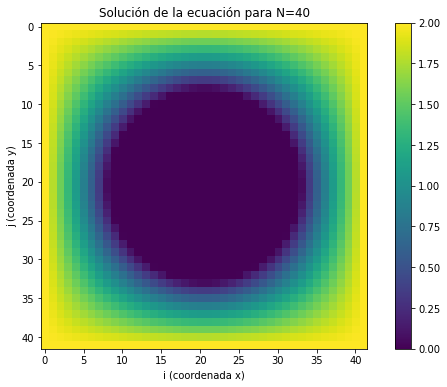

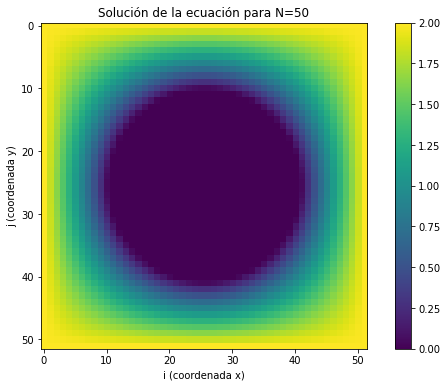

In [51]:
for N in [10,20,30,40,50]:
  sol=solve2(N)
  sol_real=np.zeros((N+2,N+2))
  for i in range(0,N+2):
    for j in range(0,N+2):
      if i==0 or j==0 or i==N+1 or j==N+1:
        sol_real[i,j]=2
      else:
        sol_real[i,j]=sol[i-1,j-1]
  fig = plt.figure(figsize = (10,6))
  plt.imshow(sol_real)
  plt.title("Solución de la ecuación para N="+str(N))
  plt.colorbar()
  plt.xlabel("i (coordenada x)")
  plt.ylabel("j (coordenada y)")
  plt.show()

En los gráficos se puede apreciar una solución acorde a lo esperado, las condiciones iniciales provocan que el borde cuadrado exterior tenga un valor constante de 2, mientras que la perforación interior vale 0 (en el interior de la perforación se colocó un valor de 0 manualmente).

Principalmente se ve un cambio gradual entre el valor de 2 a 0 a medida que se pasa desde el exterior al interior, a medida que N aumenta este cambio se ve cada vez más suave y continuo.

**P5.** ¿Qué sucede con el condicionamiento de la matriz utilizando la fórmula de la Parte a?¿Cómo adaptaría su código para el caso $f\neq 0$?

/usr/local/lib/python3.7/dist-packages/matplotlib/cbook/__init__.py:1317: ComplexWarning: Casting complex values to real discards the imaginary part
  return np.asarray(x, float)


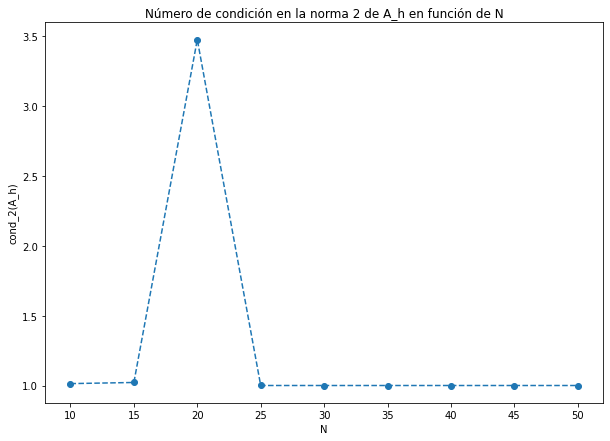

[(1.0134911663475992+0j), (1.0216859319348914+0j), (3.4760358350952982+0j), (1.0000529648611725+0j), (1.0000000000008031+0j), (1.0000000000004576+0j), (1.000000000000411+0j), (1.0000000000005898+0j), (1.000000000002803+0j)]


In [57]:
conds=[]
Ns=np.arange(10,51,5)
for N in Ns:
  Ax=Ahx(N)
  Ay=Ahy(N)
  Ah=Ax+Ay
  conds.append(cond_2_sparse(Ah))
fig = plt.figure(figsize = (10,7))
plt.plot(Ns,conds,'--o')
plt.title("Número de condición en la norma 2 de A_h en función de N")
plt.xlabel("N")
plt.ylabel("cond_2(A_h)")
plt.show()
print(conds)

Se presenta una situación bastante peculiar, el número de condición de la matriz para casi todos los valores de N es muy cercanos a 1, salvo para N=20, donde se presenta un valor anormal de $\approx$3.5.

Luego de una pequeña investigación para interpretar este número, esto nos dice que la solución del sistema ($A_hx=b$) para $N=20$ varía más cuando se cambian levemente las condiciones de representadas en $b$.

Para resolver el sistema anterior en el caso $f\neq0$ se debe discretizar la función $f$, generando el vector $(f_i)_{i\in[N^2]}$, luego para el sistema $A_hx=b$ basta modificar el $b$.

Específicamente hay que tener cuidado con la perforación del dominio. Si $x_i$ (variable dependiente) representa un punto en el interior del dominio, entonces a $b_i$ hay que sumarle $f_i$, pero si $x_i$ es un punto en la perforación, se tendrá que mantener $b_i=0$.

In [ ]:
#ahora se le puede entregar la función f (como función f(x,y))
def bh_modificado(N,f):
  h=1/(N+1)
  b=np.zeros(N**2)
  for j in range(1,N+1):
    for i in range(1,N+1):
      if (i*h-0.5)**2+(j*h-0.5)**2>0.3**2:
        b[(j-1)*N+i-1]+=f(i*h,j*h)
      #Cuando el punto interior está cerca del borde, al b hay que sumarle un coeficiente por la condición de borde
      if i==1:
        b[(j-1)*N+i-1]+=(2/h**2)
      if i==N:
        b[(j-1)*N+i-1]+=(2/h**2)
      if j==1:
        b[(j-1)*N+i-1]+=(2/h**2)
      if j==N:
        b[(j-1)*N+i-1]+=(2/h**2)
  return b